<a href="https://colab.research.google.com/github/greenty5/ict2022_fluidDynamics/blob/main/Session57_CavityFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fluid Dynamics with Python (ICT Summer School 2022)
=====
***

The final two steps in this lecture will both solve the Navier–Stokes equations in two dimensions, but with different boundary conditions.

The momentum equation in vector form for a velocity field $\vec{v}$ is:

$$\frac{\partial \vec{v}}{\partial t}+(\vec{v}\cdot\nabla)\vec{v}=-\frac{1}{\rho}\nabla p + \nu \nabla^2\vec{v}$$

This represents three scalar equations, one for each velocity component $(u,v,w)$. But we will solve it in two dimensions, so there will be two scalar equations.

Remember the continuity equation? This is where the `Poisson equation` for pressure comes in!

Cavity Flow with Navier–Stokes
----
***

Here is the system of differential equations: two equations for the velocity components $u,v$ and one equation for pressure:

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right) $$


$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right) $$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = -\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)$$

From the previous steps, we already know how to discretize all these terms. Only the last equation is a little unfamiliar. But with a little patience, it will not be hard!

### Discretized equations

First, let's discretize the $u$-momentum equation by using forward differential to time term and backward differential to spacial terms:

<font color='orange'>
$$
\cdots
$$
</font>

Similarly for the $v$-momentum equation:

<font color='orange'>
$$
\cdots
$$
</font>

Finally, the discretized pressure-Poisson equation can be written thus:

<font color='orange'>
$$
\cdots
$$
</font>

You should write these equations down on your own notes, by hand, following each term mentally as you write it.

As before, let's rearrange the equations in the way that the iterations need to proceed in the code. First, the momentum equations for the velocity at the next time step.


The momentum equation in the $u$ direction:

<font color='orange'>
$$
u_{i,j}^{n+1} = \cdots
$$
</font>

The momentum equation in the $v$ direction:

<font color='orange'>
$$
v_{i,j}^{n+1} = \cdots
$$
</font>

Almost there! Now, we rearrange the pressure-Poisson equation:

<font color='orange'>
$$
p_{i,j}^{n} = \cdots
$$
</font>

The initial condition is $u, v, p = 0$ everywhere, and the boundary conditions are:

$u=1$ at $y=2$ (the "lid");

$u, v=0$ on the other boundaries;

$\frac{\partial p}{\partial y}=0$ at $y=0$;

$p=0$ at $y=2$

$\frac{\partial p}{\partial x}=0$ at $x=0,2$


Implementing Cavity Flow
----


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
nx = 41
ny = 41
nt = 500
nit = 50
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
X, Y = np.meshgrid(x, y)

rho = 1
nu = .1
dt = .001

u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
b = np.zeros((ny, nx))

The pressure Poisson equation that's written above can be hard to write out without typos.  The function `build_up_b` below represents the contents of the square brackets, so that the entirety of the PPE is slightly more manageable.  

In [ ]:
def build_up_b(b, rho, dt, u, v, dx, dy):

  # pls write your own code here


  return b

The function `pressure_poisson` is also defined to help segregate the different rounds of calculations.  Note the presence of the pseudo-time variable `nit`.  This sub-iteration in the Poisson calculation helps ensure a divergence-free field.  

In [ ]:
def pressure_poisson(p, dx, dy, b):
    pn = np.empty_like(p)
    pn = p.copy()
    
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = # pls write your code


        # boundary condition
        p[:, -1] = p[:, -2] # dp/dx = 0 at x = 2
        p[0, :] = p[1, :]   # dp/dy = 0 at y = 0
        p[:, 0] = p[:, 1]   # dp/dx = 0 at x = 0
        p[-1, :] = 0        # p = 0 at y = 2
        
    return p

Finally, the rest of the cavity flow equations are wrapped inside the function `cavity_flow`, allowing us to easily plot the results of the cavity flow solver for different lengths of time.  

In [ ]:
def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    b = np.zeros((ny, nx))
    
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        
        b = build_up_b(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy, b)
        
        # u calculation
        u[1:-1, 1:-1] = 


        # v calculation
        v[1:-1,1:-1] = 
        

        # boundary condition
        u[0, :]  = 0
        u[:, 0]  = 0
        u[:, -1] = 0
        u[-1, :] = 1    # set velocity on cavity lid equal to 1
        v[0, :]  = 0
        v[-1, :] = 0
        v[:, 0]  = 0
        v[:, -1] = 0
        
        
    return u, v, p

Let's start with `nt = 100` and see what the solver gives us:

In [ ]:
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))
b = np.zeros((ny, nx))
nt = 100
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

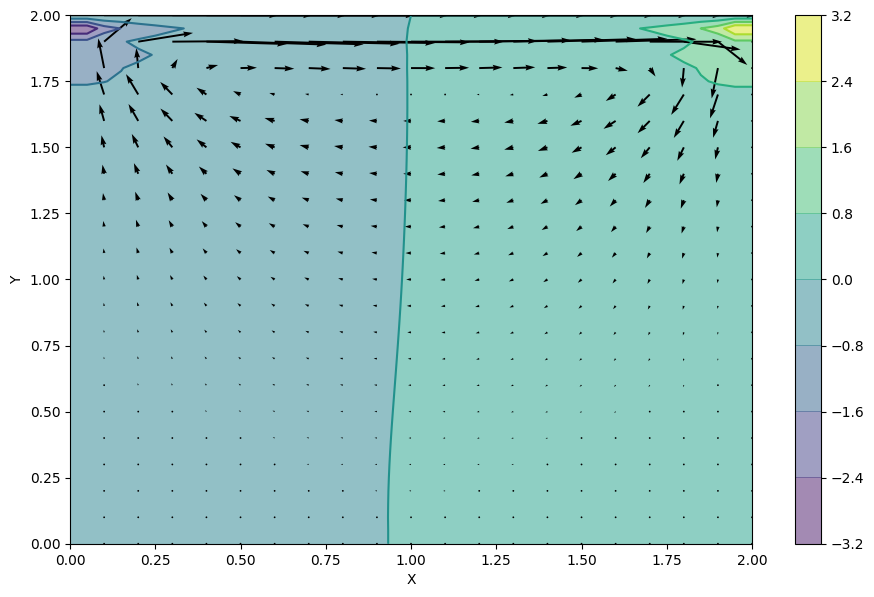

In [ ]:
fig = plt.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
plt.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)  
plt.colorbar()
# plotting the pressure field outlines
plt.contour(X, Y, p, cmap=cm.viridis)  
# plotting velocity field
plt.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2]) 
plt.xlabel('X')
plt.ylabel('Y');

You can see that two distinct pressure zones are forming and that the spiral pattern expected from lid-driven cavity flow is beginning to form.  Experiment with different values of `nt` to see how long the system takes to stabilize.  

In [ ]:
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))
b = np.zeros((ny, nx))
nt = 70
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

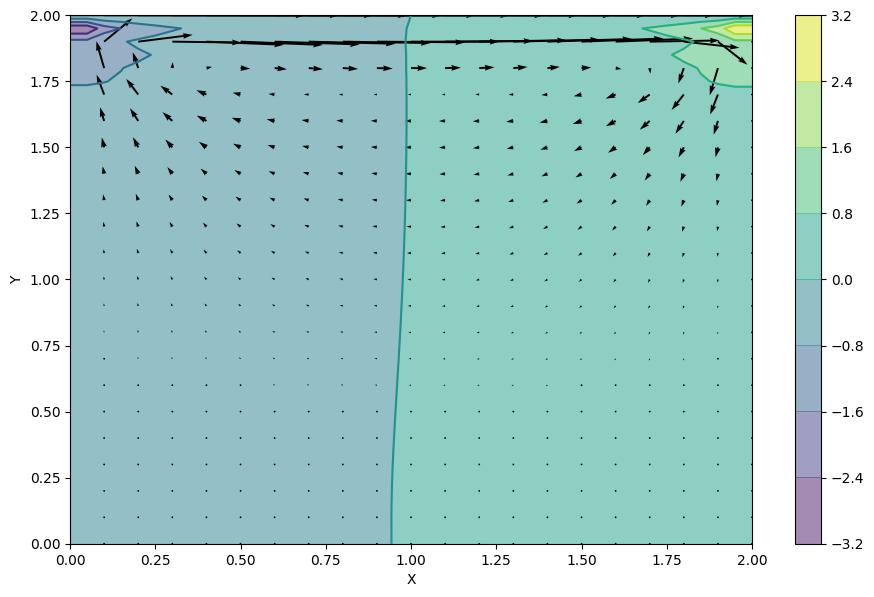

In [ ]:
fig = plt.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
plt.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)  
plt.colorbar()
# plotting the pressure field outlines
plt.contour(X, Y, p, cmap=cm.viridis)  
# plotting velocity field
plt.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2]) 
#plt.quiver(X[:, :], Y[:, :], u[:, :], v[:, :]) 
plt.xlabel('X')
plt.ylabel('Y');

The quiver plot shows the magnitude of the velocity at the discrete points in the mesh grid we created.
(We're actually only showing half of the points because otherwise it's a bit of a mess.  The `X[::2, ::2]` syntax above is a convenient way to ask for every other point.)

Another way to visualize the flow in the cavity is to use a `streamplot`:

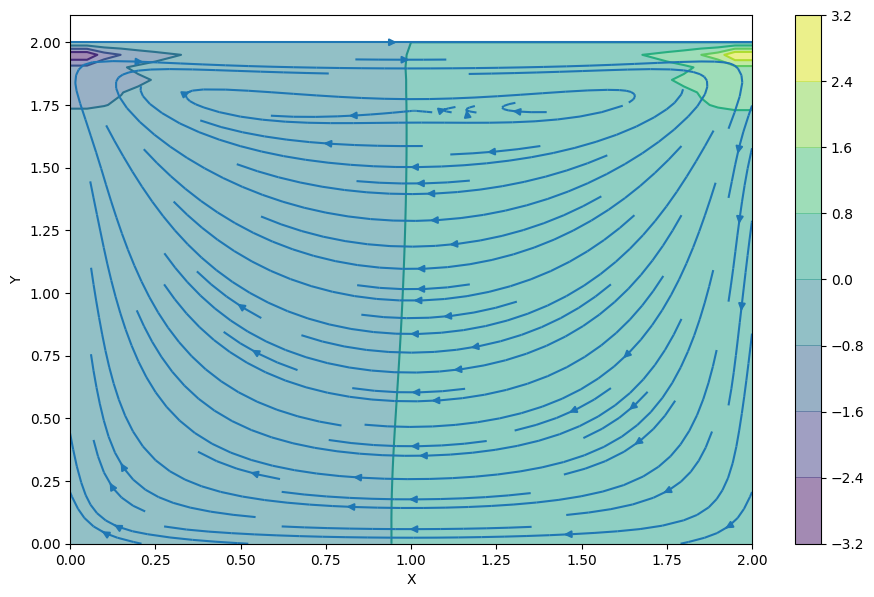

In [ ]:
fig = plt.figure(figsize=(11, 7), dpi=100)
plt.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
plt.colorbar()
plt.contour(X, Y, p, cmap=cm.viridis)
plt.streamplot(X, Y, u, v)
plt.xlabel('X')
plt.ylabel('Y');

***

Finally, you solved the Navier-Stokes equation and continuity equation simultaneously. And now, you are able to simulate fluid flow field ❗❗

Good job 😃